In [1]:
import tensorflow as tf
from keras  import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from keras.preprocessing.image import ImageDataGenerator
import splitfolders 

In [15]:
image=(256,256)
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20

In [3]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10

)

#splitfolders.ratio("C:/Users/darre/OneDrive/Desktop/Darren/College Stuff/potato-disease-detection/Datasets/PlantVillage",
                    #output="C:/Users/darre/OneDrive/Desktop/Darren/College Stuff/potato-disease-detection/new_dataset", seed=1337, ratio=(.7, .1, .2), group_prefix=None) 



In [4]:
train_generator=train_datagen.flow_from_directory(
    'new_dataset/train',
    target_size=image,
    batch_size=32,
    class_mode='sparse',

    
)

Found 1506 images belonging to 3 classes.


In [5]:
val_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10

)

val_generator=train_datagen.flow_from_directory(
    'new_dataset/val',
    target_size=image,
    batch_size=32,
    class_mode='sparse',

)

Found 215 images belonging to 3 classes.


In [6]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10

)

test_generator=train_datagen.flow_from_directory(
    'new_dataset/test',
    target_size=image,
    batch_size=32,
    class_mode='sparse',

)

Found 431 images belonging to 3 classes.


In [7]:
n_classes=3
model=models.Sequential([
    layers.InputLayer(input_shape=(256,256,3)),
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
              ,metrics=['accuracy'])

In [10]:
history=model.fit(train_generator,
          steps_per_epoch=32,
          validation_data=val_generator,
          validation_steps=6,
          verbose=1,
          epochs=20
          )

Epoch 1/20
32/32 [==============================] - 61s 2s/step - loss: 0.9854 - accuracy: 0.4608 - val_loss: 0.9240 - val_accuracy: 0.4531
Epoch 2/20
32/32 [==============================] - 64s 2s/step - loss: 0.8987 - accuracy: 0.4619 - val_loss: 0.9240 - val_accuracy: 0.4688
Epoch 3/20
32/32 [==============================] - 63s 2s/step - loss: 0.9023 - accuracy: 0.5151 - val_loss: 0.8140 - val_accuracy: 0.5833
Epoch 4/20
32/32 [==============================] - 62s 2s/step - loss: 0.7322 - accuracy: 0.6469 - val_loss: 0.6760 - val_accuracy: 0.6927
Epoch 5/20
32/32 [==============================] - 62s 2s/step - loss: 0.5779 - accuracy: 0.7384 - val_loss: 0.5238 - val_accuracy: 0.7500
Epoch 6/20
32/32 [==============================] - 63s 2s/step - loss: 0.5188 - accuracy: 0.7767 - val_loss: 0.3494 - val_accuracy: 0.8698
Epoch 7/20
32/32 [==============================] - 62s 2s/step - loss: 0.3144 - accuracy: 0.8712 - val_loss: 0.2937 - val_accuracy: 0.8854
Epoch 8/20
32/32 [==

In [11]:
scores=model.evaluate(test_generator)

14/14 [==============================] - 10s 708ms/step - loss: 0.3187 - accuracy: 0.8817


In [12]:
scores

[0.31865066289901733, 0.8816705346107483]

In [13]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Traing and Validation loss')

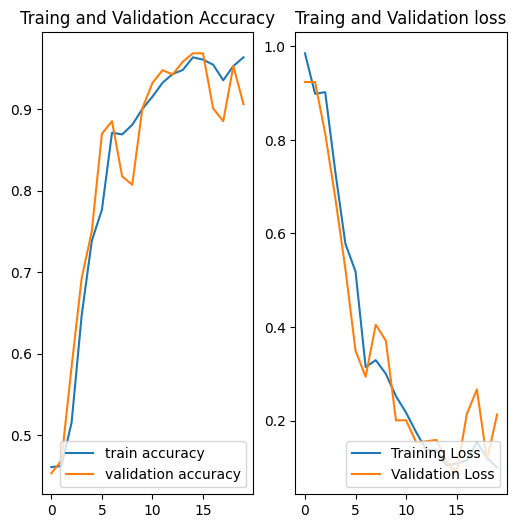

In [16]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="train accuracy")
plt.plot(range(EPOCHS),val_acc,label="validation accuracy")
plt.legend(loc='lower right')
plt.title('Traing and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='lower right')
plt.title('Traing and Validation loss')


In [17]:
class_names=["Early_Blight","Late_Blight","Healthy"]


actual Early_Blight
1/1 [==============================] - 0s 371ms/step
predicted label:  Early_Blight


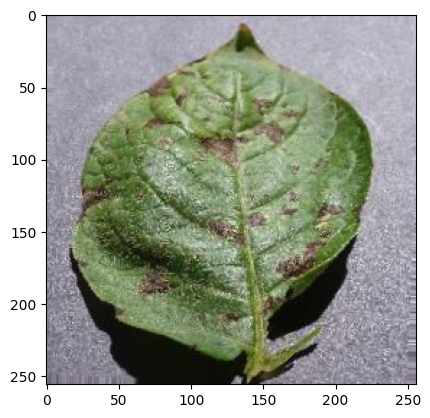

In [22]:
import numpy as np
for image_batch,label_batch in test_generator:
    first_image=image_batch[0]
    first_label=int(label_batch[0])
    plt.imshow(first_image)
    print("actual",class_names[first_label])
    batch_prediction=model.predict(image_batch)
    print('predicted label: ' ,class_names[np.argmax(batch_prediction[0])])
    break


In [23]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 31ms/step


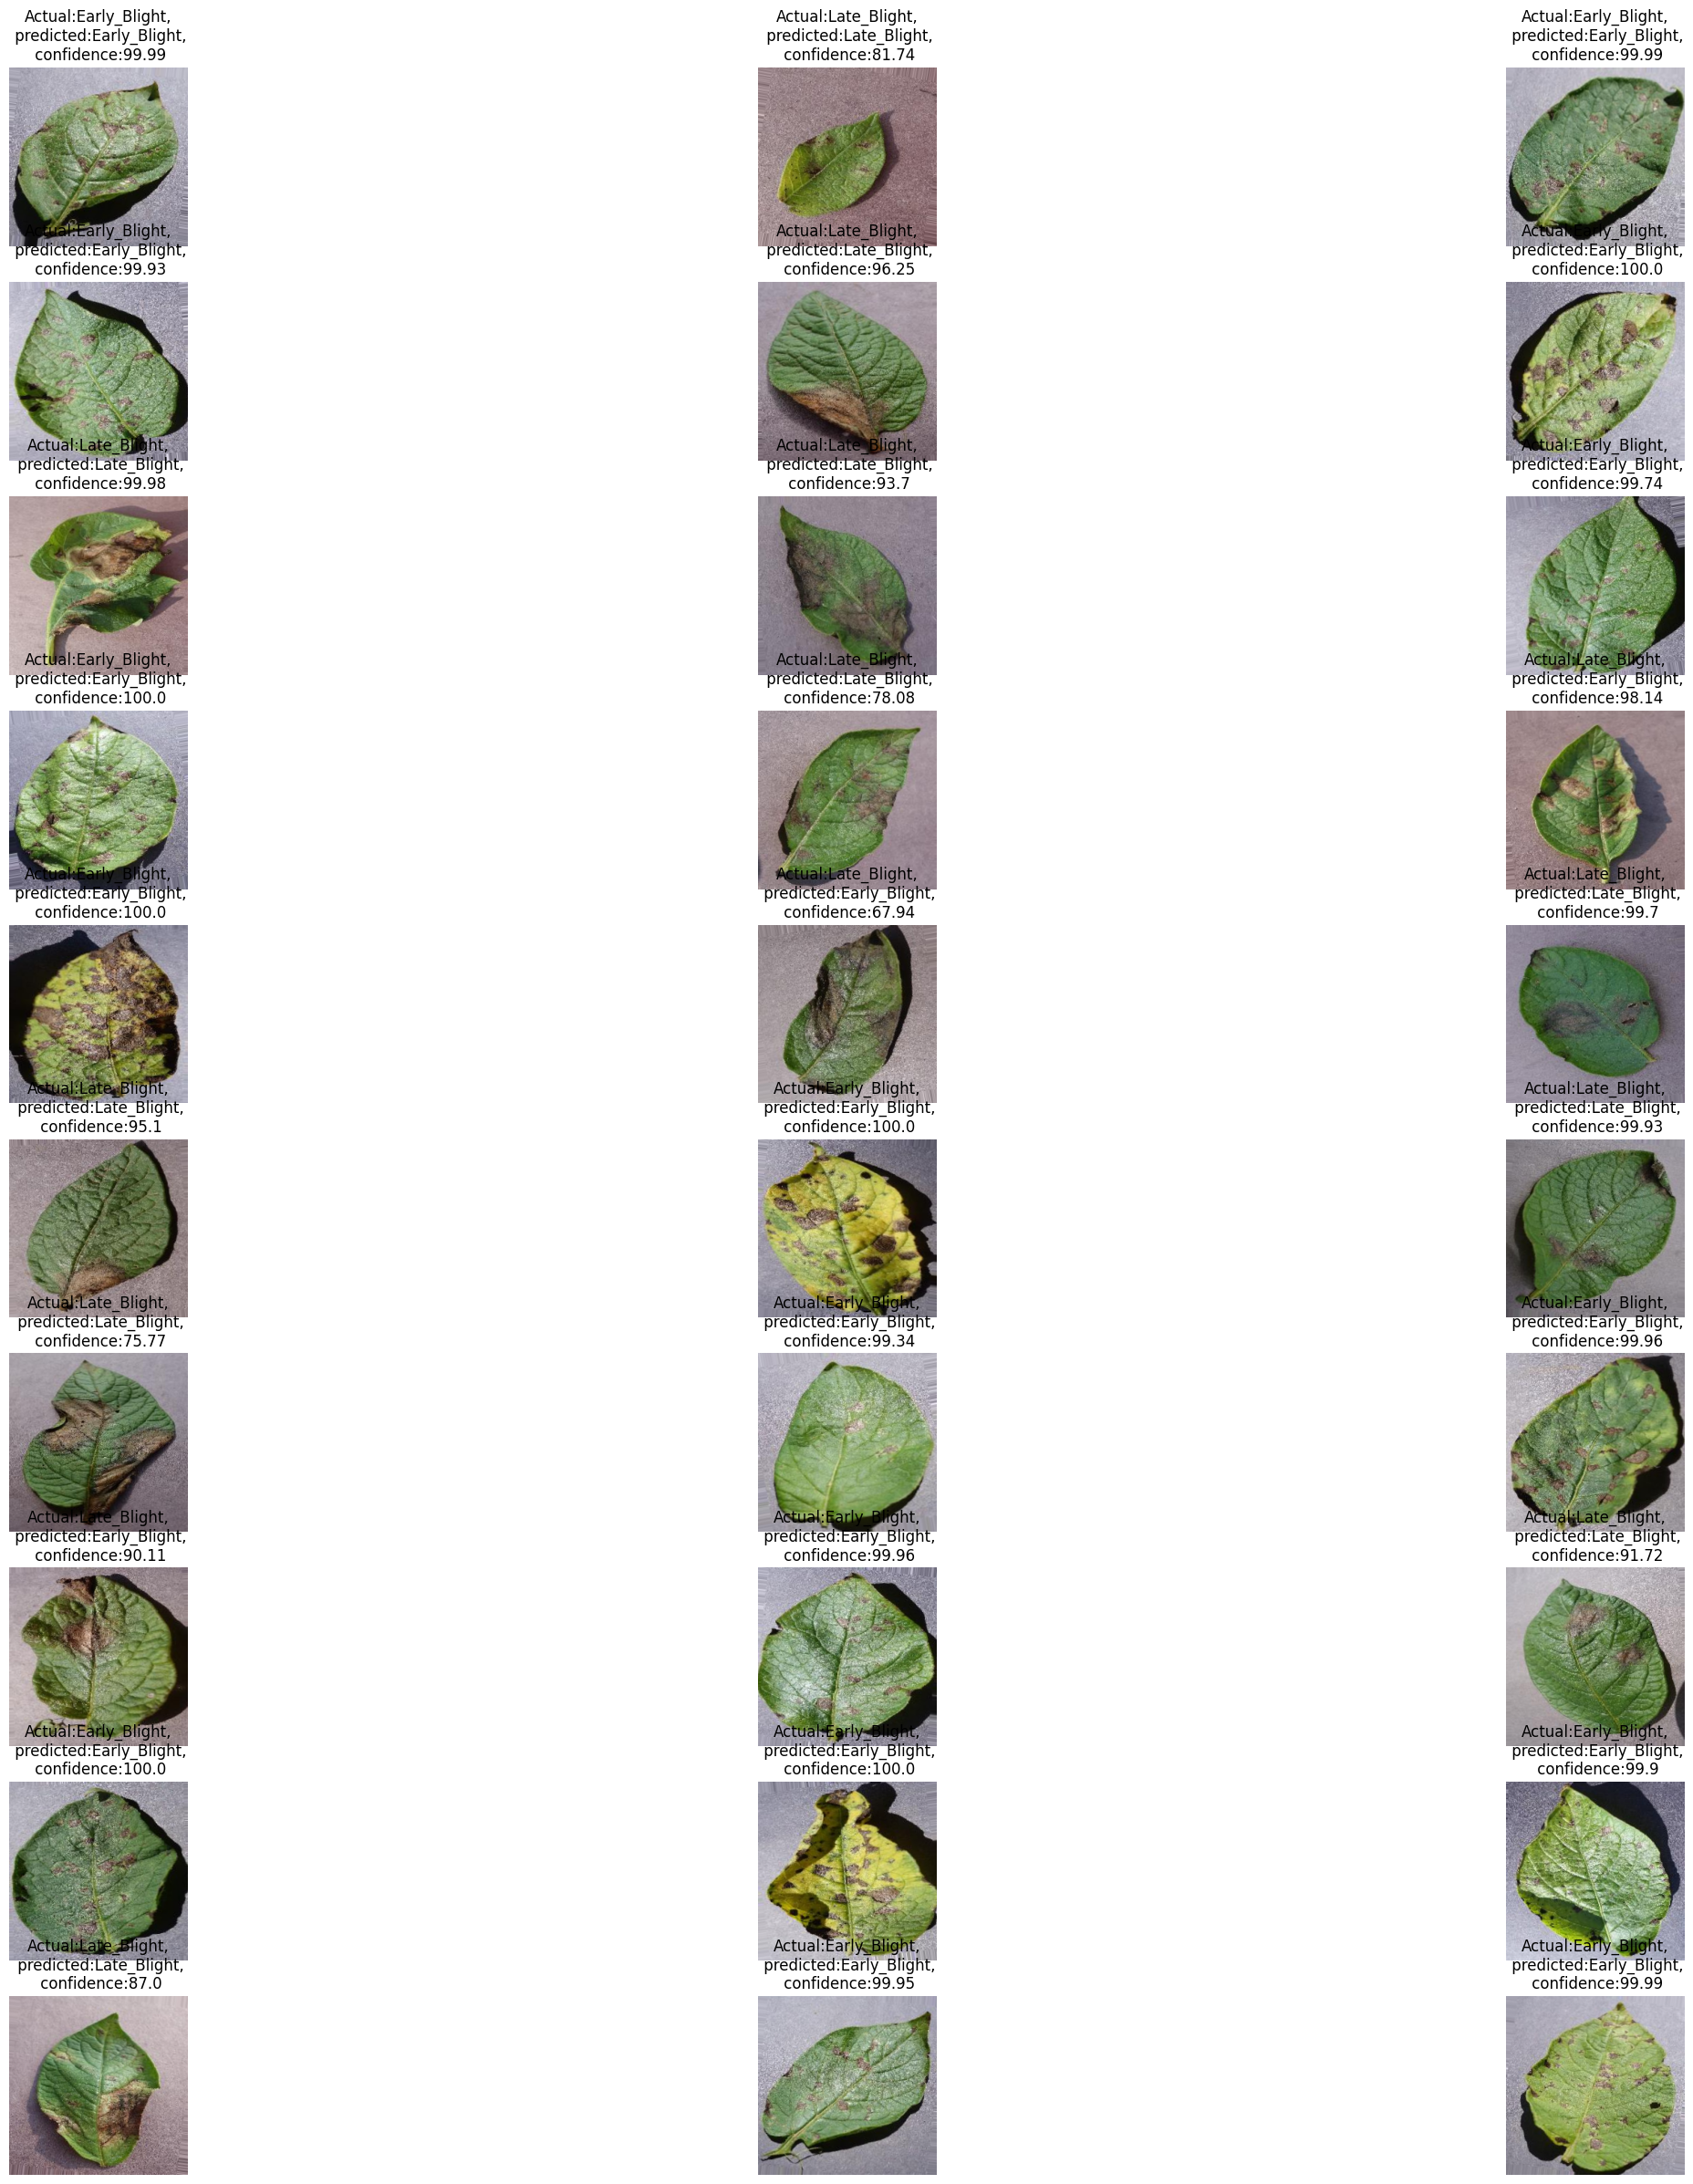

In [29]:
plt.figure(figsize=(30,30))
for images,labels in test_generator:
    for i in range (30):
        ax=plt.subplot(10,3,i+1)
        plt.imshow(images[i])
        predicted_class,confidence=predict(model,images[i])
        actual_class=class_names[int(labels[i])]
        plt.title(f"Actual:{actual_class},\n predicted:{predicted_class},\n confidence:{confidence}")
        plt.axis('off')
    break

In [28]:
model.save("potatoes.h5")